In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## WITHOUT VECTORIZATION

import time
import matplotlib.pyplot as plt
y=[2.0,3.0,4.0,5.0,6.0]
x=[[1.0,2.0,3.0],[2.0,3.0,4.0],[1.0,2.0,5.0],[3.0,4.0,5.0],[2.0,4.0,5.0]]
w=[0.0,0.0,0.0]
b=0
alph=0.01
it=1000
m=5
n=3
cost_it=[]
st=time.time()
for i in range(it):
    dw=[0,0,0]
    db=0
    c=0
    for j in range(m):
        yh=0
        for k in range(n):
            yh+=x[j][k]*w[k]
        yh+=b
        e=yh-y[j]
        c+=e**2
        for a in range(n):
            dw[a]+=e*x[j][a]
        db+=e
    for j in range(n):
        w[j]-=alph*(dw[j]/m)
    b-=alph*(db/m)
    c=c/(2*m)
    cost_it.append(c)
    
end=time.time()
for i in range(n):
    print(w[i])
print(b)
print(end-st)
plt.plot(range(it), cost_it)
plt.title("Cost vs. Epochs")
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Cost (MSE)")
plt.show()

Training Time: 31.258159160614014


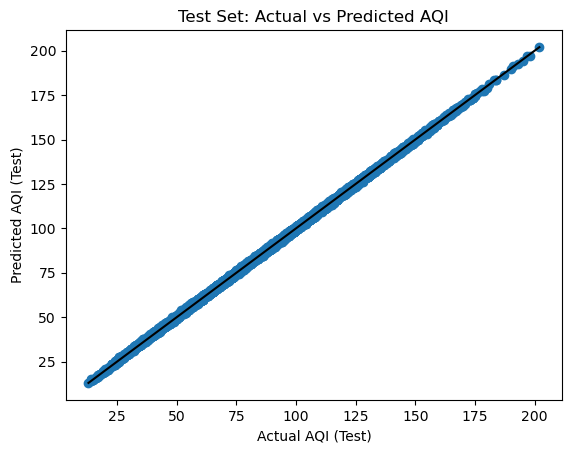

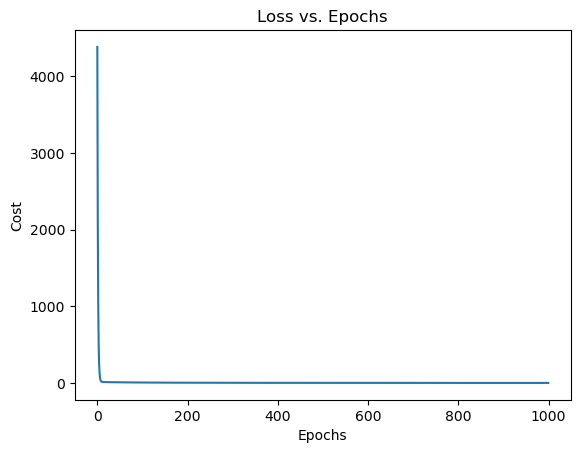

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load dataset
df = pd.read_csv("india_city_aqi_2015_2023.csv")
df = df[['pm25','pm10','no2','so2','co','o3','aqi']].dropna()

# Convert to lists (retain original structure)
x = df[['pm25','pm10','no2','so2','co','o3']].values.tolist()
y = df['aqi'].values.tolist()

# Shuffle data
np.random.seed(42)
indices = np.random.permutation(len(x))
x = [x[i] for i in indices]
y = [y[i] for i in indices]

# 80-20 split
split = int(0.8 * len(x))

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

m = len(y_train)
n = len(x_train[0])

w = [0.0]*n
b = 0.0
alph = 0.00001
it = 1000
cost_it = []

st = time.time()

for i in range(it):
    dw = [0.0]*n
    db = 0.0
    c = 0.0
    #loop to calculate dw and db
    for j in range(m):
        yh = 0.0
        for k in range(n):
            yh += x_train[j][k]*w[k]
        yh += b
        
        e = yh - y_train[j]
        c += e**2
        
        for a in range(n):
            dw[a] += e*x_train[j][a]
        db += e
    #loop to update w and b
    for j in range(n):
        w[j] -= alph*(dw[j]/m)
    b -= alph*(db/m)
    
    c = c/(2*m)
    cost_it.append(c)

end = time.time()

print("Training Time:", end-st)

#testing
y_pred_test = []
for i in range(len(x_test)):
    yh = 0.0
    for k in range(n):
        yh += x_test[i][k]*w[k]
    yh += b
    y_pred_test.append(yh)
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],color='black')
plt.xlabel("Actual AQI (Test)")
plt.ylabel("Predicted AQI (Test)")
plt.title("Test Set: Actual vs Predicted AQI")
plt.show()


#loss vs epochs
plt.plot(range(it), cost_it)
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()


## VECTORIZED VERSION


import time
x=np.array([[1.0,2.0,3.0],[2.0,3.0,4.0],[1.0,2.0,5.0],[3.0,4.0,5.0],[2.0,4.0,5.0]])
y=np.array([2.0,3.0,4.0,5.0,6.0])
w=np.array([0.0,0.0,0.0])
b=0.0
alph=0.01
it=1000
m=5
n=3
st=time.time()
for i in range(it):
    yh=np.dot(x,w)+b
    e=yh-y
    dw=np.dot(x.T,e)/m
    db=np.sum(e)/m
    w-=alph*dw
    b-=alph*db
end=time.time()
print(w)
print(b)
print(end-st)


Training Time: 0.36101508140563965


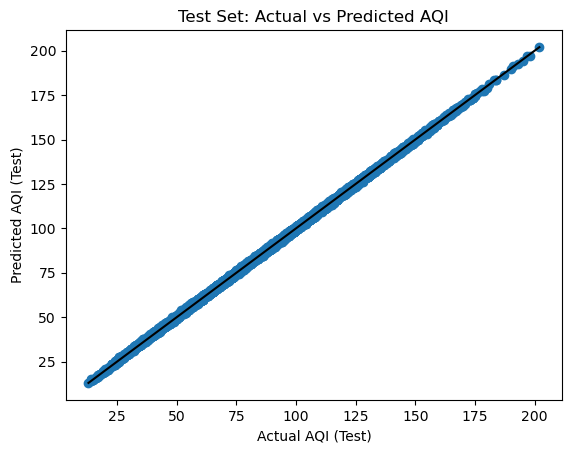

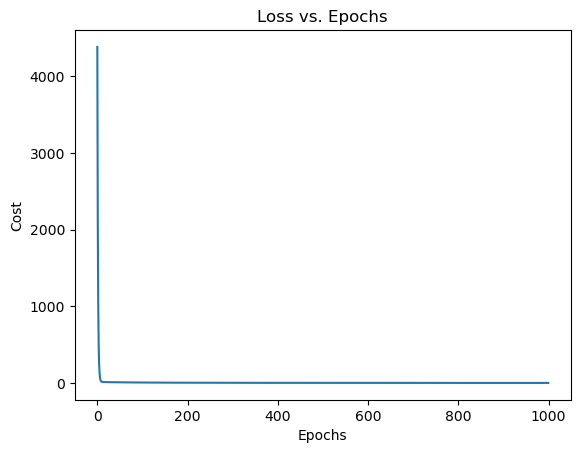

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load dataset
df = pd.read_csv("india_city_aqi_2015_2023.csv")
df = df[['pm25','pm10','no2','so2','co','o3','aqi']].dropna()

x = df[['pm25','pm10','no2','so2','co','o3']].values
y = df['aqi'].values

# Shuffle
np.random.seed(42)
indices = np.random.permutation(len(x))
x = x[indices]
y = y[indices]

# 80-20 split
split = int(0.8 * len(x))

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

m = x_train.shape[0]
n = x_train.shape[1]

w = np.zeros(n)
b = 0.0
alph = 0.00001
it = 1000
cost_it = []

st = time.time()

for i in range(it):
    yh = np.dot(x_train, w) + b
    e = yh - y_train
    #calculate dw and db
    dw = np.dot(x_train.T, e)/m
    db = np.sum(e)/m
    #update w and b
    w -= alph*dw
    b -= alph*db
    
    c = np.sum(e**2)/(2*m)
    cost_it.append(c)

end = time.time()

print("Training Time:", end-st)

# testing
y_pred_test = np.dot(x_test, w) + b

plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],color='black')
plt.xlabel("Actual AQI (Test)")
plt.ylabel("Predicted AQI (Test)")
plt.title("Test Set: Actual vs Predicted AQI")
plt.show()

plt.plot(range(it), cost_it)
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()


In [32]:
print(31.83/0.353)


90.1699716713881


Vectorized form is 90 times faster